In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
# Load data

df = pd.read_csv('Global_Superstore2.csv', encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [23]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [24]:
print(df.columns)
print("Shape (rows, columns):", df.shape)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')
Shape (rows, columns): (51290, 24)


In [25]:
print(df.isnull().sum())


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [26]:
# Convert dates

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', dayfirst=True)


In [28]:
# New derived column: profit margin
df['profit_margin'] = df['Profit'] / df['Sales']

In [29]:
# Extract year for time series analysis
df['order_year'] = df['Order Date'].dt.year

In [30]:

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,profit_margin,order_year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0.330000,2012
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,-0.077847,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,0.177766,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,-0.033376,2013
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,0.109963,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,0.069124,2014
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,-2.500000,2014
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,0.490000,2013
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,0.178571,2012


In [33]:
# Analysis 1: Top 10 most profitable products

top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: Profit, dtype: float64


In [34]:
# Analysis 2: Country with the highest sales
top_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 countries by sales:")
print(top_country)

Top 5 countries by sales:
Country
United States    2.297201e+06
Australia        9.252359e+05
France           8.589311e+05
China            7.005620e+05
Germany          6.288400e+05
Name: Sales, dtype: float64


In [35]:
# Analysis 3: Sales trend over years
sales_by_year = df.groupby('order_year')['Sales'].sum()
print("Sales by year:")
print(sales_by_year)

Sales by year:
order_year
2011    2.259451e+06
2012    2.677439e+06
2013    3.405746e+06
2014    4.299866e+06
Name: Sales, dtype: float64


In [36]:

# Analysis 4: Sales and profit by Segment
sales_by_segment = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("Sales and Profit by segment:")
print(sales_by_segment)

Sales and Profit by segment:
                    Sales        Profit
Segment                                
Consumer     6.507949e+06  749239.78206
Corporate    3.824698e+06  441208.32866
Home Office  2.309855e+06  277009.18056


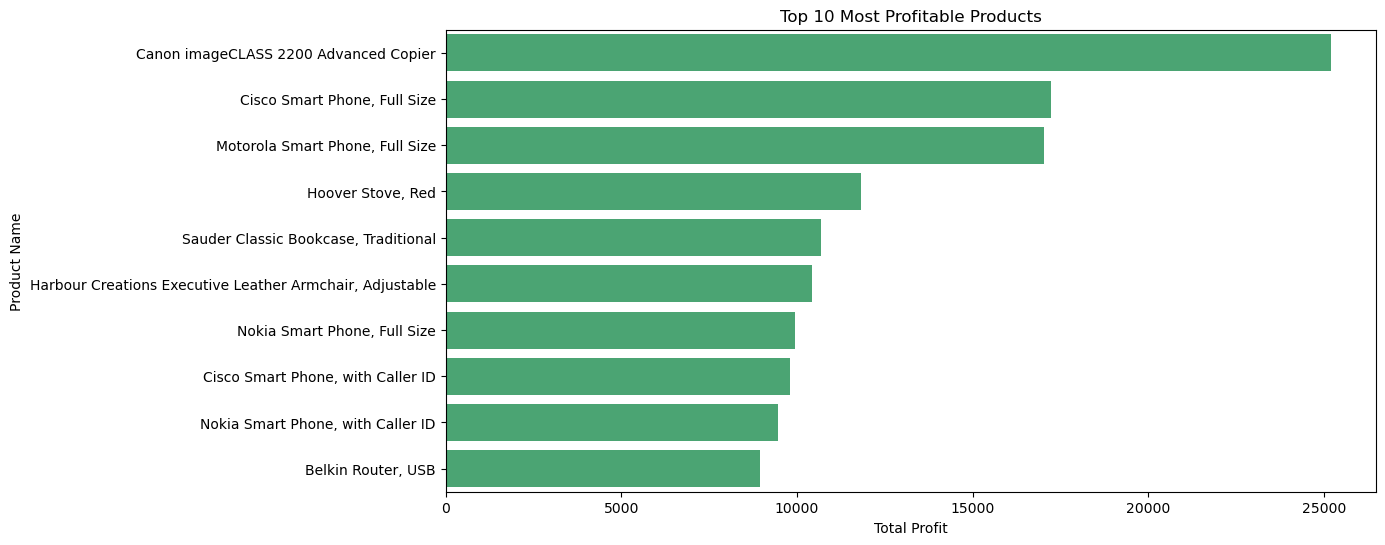

In [37]:
# Visualization 1: Bar plot top 10 profitable products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, color="mediumseagreen")
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

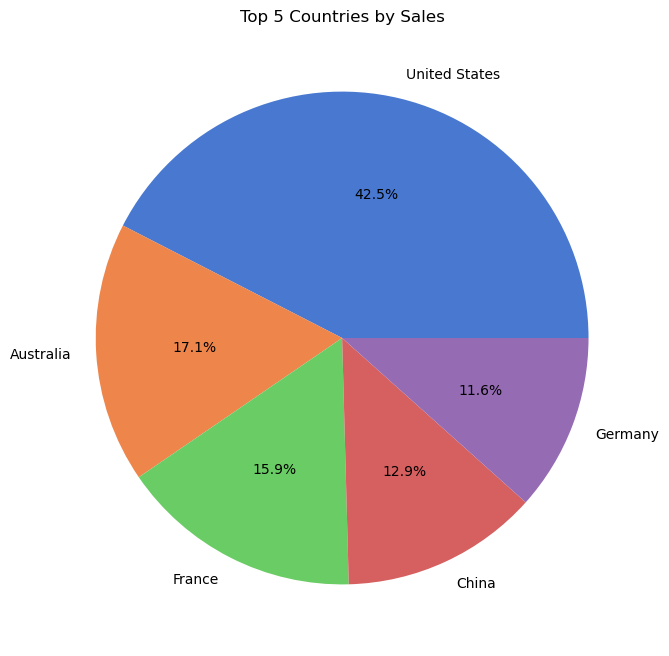

In [38]:
# Visualization 2: Pie chart sales by country (top 5)
plt.figure(figsize=(8,8))
top_country.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Top 5 Countries by Sales')
plt.ylabel('')
plt.show()

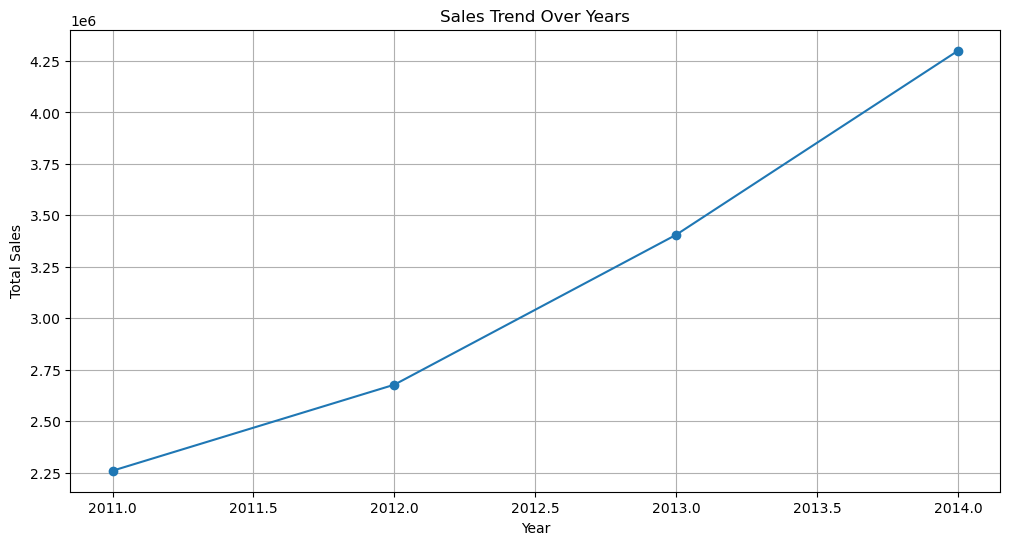

In [39]:
# Visualization 3: Line chart of sales trend over years
plt.figure(figsize=(12,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')
plt.title('Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

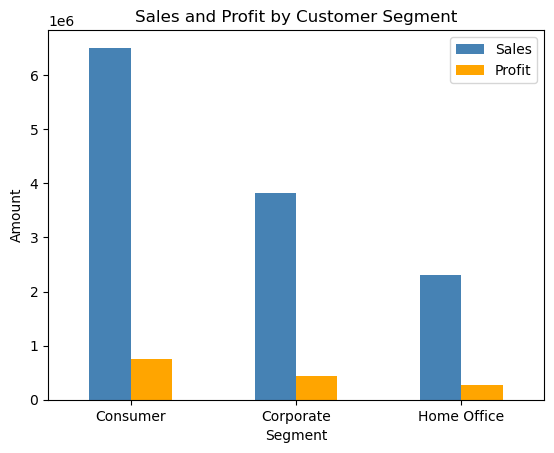

In [40]:
# Visualization 4: Bar plot Sales and Profit by Segment
plt.figure(figsize=(10,6))
sales_by_segment.plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(["Sales", "Profit"])
plt.show()